In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import geocoder
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


In [12]:
# USA States data 
df= pd.read_csv('C:/Users/rmarathe/Desktop/Projects/Coursera-Capstone/USA_States_cities.csv')

In [13]:
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [14]:
df.shape

(28889, 19)

In [96]:
#setting up empty dataframes

df_r = pd.DataFrame() #restaurants dataframe
df_uni = pd.DataFrame() # Univeristies dataframe
df_ta = pd.DataFrame() # Tourist Attractions dataframe

In [18]:
df1 = df[df['population']>100000] # population 0.1M

In [20]:
df2 =df1[['state_id','city','lat','lng','population']].sort_values(by ='state_id')

In [792]:
print(df2.head())

df2.shape

      state_id        city      lat       lng  population
6624        AK   Anchorage  61.1508 -149.1091      253421
14439       AL  Birmingham  33.5277  -86.7987      744189
14440       AL  Montgomery  32.3473  -86.2666      255908
14524       AL  Tuscaloosa  33.2348  -87.5266      154204
14867       AL  Huntsville  34.6988  -86.6412      309716


(451, 5)

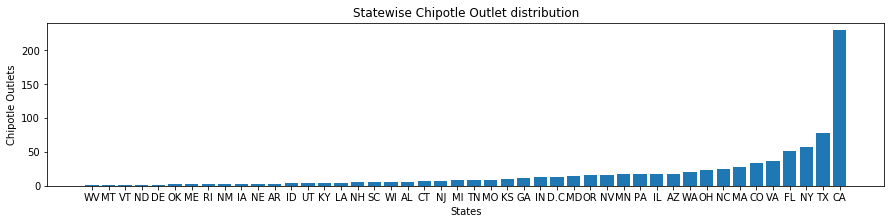

<Figure size 432x288 with 0 Axes>

In [1141]:
plt.figure(figsize=(15,3))
y_pos=np.arange(len(df_g['location.state']))
plt.bar(y_pos, df_g['id'])
plt.xticks(y_pos,df_g['location.state'])
plt.title('Statewise Chipotle Outlet distribution')
plt.xlabel('States')
plt.ylabel('Chipotle Outlets')
plt.show()

names = df_g['location.state']
values = df_g['id']

plt.savefig('C:/Users/rmarathe/Desktop/Projects/Coursera-Capstone/fig1.png')
plt.savefig('fig1.pdf')
plt.show()


In [23]:
CLIENT_ID = 'YBCPSEG3FO2VBAYYH11GH2OF0NL3YTZMKF34WRMIPL2RTHFH'
CLIENT_SECRET = '4A3UAJ1EIUPABM4NY3TG2YE4OBQQEJ3IDEZLH31QK1SZ5GI0'
VERSION = '20180604'
LIMIT=10

In [28]:
# set query to fetch Chipotle stores in USA
search_query = 'Chipotle'
radius = 5000

### Fetch Chipotle store information using Foursquare API for all cities with population >100,000

In [29]:
# fetch Chipotle store information using Foursquare API for all cities with population >100,000
for i,lng in enumerate(df2['lng']):
 #   print(df2.iloc[i]['lat'],df2.iloc[i]['lng'])
    latitude = df2.iloc[i]['lat']
    longitude = df2.iloc[i]['lng']
    url_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION, search_query, radius, LIMIT)
    #print(url_r)
    results = requests.get(url_r).json()
    venues = results['response']['venues']
    df_r = df_r.append(json_normalize(venues))
    
print('Appended')
               

C:\Users\rmarathe\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Appended


In [67]:
# Dataframe size of Chipotle restaurant outets in USA for population >100000
print(df_r.shape)
print(df_r.head())
df_r.describe()

(845, 24)


In [794]:
!pip install folium
import folium # map rendering library

### Statewise filtering and grouping of stores


#### The prolem is to find the state to open the next Chipotle store where there are no outlets or less than 3 outlets. Hence data is filtered on states with <3 outlets

In [49]:
df_g = df_r[['id','location.state', 'location.city','location.distance','location.neighborhood','location.lat',
       'location.lng']].groupby(['location.state']).count().sort_values(by ='id').reset_index()
#df_g

In [51]:
df_g = df_r[['location.state','id']].groupby(['location.state']).count().sort_values(by ='id').reset_index()#by='id') #)
print(df_g[df_g['id'] <3])

  location.state  id
0             WV   1
1             MT   1
2             VT   1
3             ND   1
4             DE   1
5             OK   2
6             ME   2
7             RI   2


In [80]:
df2_filter = df2[df2['state_id'].isin (['WV','MT','VT','ND','DE','OK','ME','RI'])]
df2_filter

,state_id,city,lat,lng,population
696,DE,Dover,39.1610,-75.5203,115352
20147,ME,Portland,43.6773,-70.2715,206023
26297,MT,Billings,45.7889,-108.5509,120800
7546,ND,Fargo,46.8653,-96.8292,204820
21235,OK,Tulsa,36.1284,-95.9043,672054
20983,OK,Oklahoma City,35.4676,-97.5137,955998
20832,OK,Norman,35.2335,-97.3471,115065
20716,OK,Broken Arrow,36.0365,-95.7809,108303
11641,RI,Providence,41.8230,-71.4187,1206642
15459,VT,Burlington,44.4877,-73.2314,108277


### Filter Outlets information for selected states

In [68]:
df_r_filter = df_r[df_r['location.state'].isin (['WV','MT','VT','ND','DE','OK','ME','RI'])]
df_r_filter

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c90f0837f3b8cfa406b981e,1141 N DuPont Hwy Ste 101,...,3194,[1141 N DuPont Hwy Ste 101 (at Dover Downs Acc...,"[{'label': 'display', 'lat': 39.18678446887631...",39.186784,-75.536558,NaN,19901,DE,Chipotle Mexican Grill,v-1572278921
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",1322573,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/chipotle-19...,False,57238a2c498ee8a21f340a9a,45 Marginal Way,...,1910,"[45 Marginal Way, Portland, ME 04101, United S...","[{'label': 'display', 'lat': 43.66049450790936...",43.660495,-70.266657,NaN,04101,ME,Chipotle Mexican Grill,v-1572278987
1,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f428c16e4b0f4e3fd5d8297,11 Main St Ste 3,...,4690,"[11 Main St Ste 3 (Main Street and Route 95), ...","[{'label': 'display', 'lat': 43.67755647093197...",43.677556,-70.329753,NaN,04092,ME,Chipotle Mexican Grill,v-1572278987
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,55318f80498ef49d4decf1dd,1601 Grand Ave Ste 100,...,684,"[1601 Grand Ave Ste 100, Billings, MT 59102, U...","[{'label': 'display', 'lat': 45.78437258964617...",45.784373,-108.556860,NaN,59102,MT,Chipotle Mexican Grill,v-1572279003
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,54d9369e498e63638e9de0c9,1680 45th St S,...,2692,"[1680 45th St S (45th & 17th), Fargo, ND 58103...","[{'label': 'display', 'lat': 46.85533918275391...",46.855339,-96.861437,NaN,58103,ND,Chipotle Mexican Grill,v-1572279014
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,525ef28511d2818a08ff6a17,"5730 E 41st St, Ste 200",...,2799,"[5730 E 41st St, Ste 200 (S Hudson Ave.), Tuls...","[{'label': 'display', 'lat': 36.10391968636196...",36.103920,-95.911413,NaN,74135,OK,Chipotle Mexican Grill,v-1572279044
1,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,5318bd17498edf5229f1f766,6060 S Yale Ave,...,6092,"[6060 S Yale Ave (E 61st St), Tulsa, OK 74135,...","[{'label': 'display', 'lat': 36.07573563994678...",36.075736,-95.922725,NaN,74135,OK,Chipotle Mexican Grill,v-1572279044
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",1315127,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/chipotle-23...,False,4d066b110e49721e8c1c7b7f,235 Thayer St,...,1612,"[235 Thayer St, Providence, RI 02906, United S...","[{'label': 'display', 'lat': 41.82820180166769...",41.828202,-71.400554,NaN,02906,RI,Chipotle Mexican Grill,v-1572279059
1,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",1321763,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/chipotle-13...,False,57fc3a61498e26cb119b5b29,1386 Atwood Ave,...,6517,"[1386 Atwood Ave, Johnston, RI 02919, United S...","[{'label': 'display', 'lat': 41.81454904551709...",41.814549,-71.496436,NaN,02919,RI,Chipotle Mexican Grill,v-1572279059
0,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f5b7762e4b008b1564ecf90,580 Shelburne Rd Ste 14B,...,4712,"[580 Shelburne Rd Ste 14B (at I-189), Burlingt...","[{'label': 'display', 'lat': 44.448782, 'lng':...",44.448782,-73.208072,NaN,05401,VT,Chipotle Mexican Grill,v-1572279116


### Fetch  universities & tourist attraction in states - where there are less than 3 Chipotle outlets 

In [125]:
# code for fetching uni & attraction in states - where Chipotle outlets are less than 3


# search educational Institutes
LIMIT = 10
radius = 5000
search_id = 'university'
search_query2 ='places'


for i,state in enumerate(df2_filter['state_id']):
    #print(df2.iloc[i]['lat'],df2.iloc[i]['lng'])
    latitude = df2_filter.iloc[i]['lat']
    longitude = df2_filter.iloc[i]['lng']
    url_u = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION,search_id,radius, LIMIT)
    url_u
    results_u = requests.get(url_u).json()
    results_u
     assign Educational Institutes JSON to df_uni
    outlet_u = results_u['response']['venues']
     tranform venues into a dataframe by appending previous
    df_uni = df_uni.append(json_normalize(outlet_u))
    
    #search Tourist attractions
    url_ta = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION,radius, LIMIT)
    #url_ta
    results = requests.get(url_ta).json()
    # assign relevant part of JSON to tourist_attactions
    tourist_attactions = results['response']['venues']
    # tranform venues into a dataframe
    df_ta = df_ta.append(json_normalize(tourist_attactions))
    
    
print('Appended....University')   
print('Appended....Attraction') 
    


Appended....University
Appended....Attraction


In [149]:
df_ta

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '50aaa49e4b90af0d42d5de11', 'name': 'C...",False,5d6c64f551bb400008bcec83,1337 Quartz Pl,US,Billings,United States,Prospectors Ln,5824,"[1337 Quartz Pl (Prospectors Ln), Billings, MT...","[{'label': 'display', 'lat': 45.82297, 'lng': ...",45.822970,-108.493930,59105,MT,49Er Places,v-1572284257,NaN
1,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,4e429f171f6ec93e9256a6d3,80 14th St W,US,Billings,United States,NaN,1165,"[80 14th St W, Billings, MT 59102, United States]","[{'label': 'display', 'lat': 45.77843431405302...",45.778434,-108.551274,59102,MT,Park Place Salon,v-1572284257,NaN
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,56967c21498e7ba8c15b0b42,2480 Grant Road,US,Billings,United States,NaN,4648,"[2480 Grant Road, Billings, MT 59102, United S...","[{'label': 'display', 'lat': 45.75195567374336...",45.751956,-108.578798,59102,MT,TownePlace Suites by Marriott Billings,v-1572284257,182996552
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,555fe805498e20cf2ed2da1a,NaN,US,Billings,United States,NaN,4645,"[Billings, MT, United States]","[{'label': 'display', 'lat': 45.75200092336242...",45.752001,-108.578835,NaN,MT,TownePlace Suites By Marriott,v-1572284257,NaN
0,"[{'id': '4bf58dd8d48988d1e8931735', 'name': 'P...",False,4fa29785e4b04db7bdd93a5b,"1210 19 1/2 St S, Moorhead, MN 56560",US,Moorhead,United States,NaN,6142,"[1210 19 1/2 St S, Moorhead, MN 56560, Moorhea...","[{'label': 'display', 'lat': 46.86170356726566...",46.861704,-96.748675,56560,MN,Parker Place Studios,v-1572284259,NaN
0,[],False,4bdc40253904a593b4584d9e,6590 E Skelly Dr,US,Tulsa,United States,NaN,2024,"[6590 E Skelly Dr, Tulsa, OK 74145, United Sta...","[{'label': 'display', 'lat': 36.11079828388289...",36.110798,-95.898634,74145,OK,RitePlace Storage,v-1572284260,NaN
0,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4c5d81aa85a1e21e0c835911,NaN,US,Oklahoma City,United States,NaN,5106,"[Oklahoma City, OK 73109, United States]","[{'label': 'display', 'lat': 35.423971, 'lng':...",35.423971,-97.531081,73109,OK,Intrgris Children's Place-SW,v-1572284261,NaN
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4bd84e792ecdce725ab7d0f2,2251 N. Stone Wood Circle,US,Broken Arrow,United States,NaN,4272,"[2251 N. Stone Wood Circle, Broken Arrow, OK 7...","[{'label': 'display', 'lat': 36.07311704541326...",36.073117,-95.795143,74012,OK,TownePlace Suites Tulsa Broken Arrow,v-1572284264,182983816
0,"[{'id': '5032885091d4c4b30a586d66', 'name': 'R...",False,5d1df53d557df1002b5c5c22,35 S Angell St,US,Providence,United States,NaN,2750,"[35 S Angell St, Providence, RI 02906, United ...","[{'label': 'display', 'lat': 41.82962332092818...",41.829623,-71.386761,02906,RI,Places & Spaces Realty,v-1572284265,NaN
1,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,4eceb5b299114b488635c8f6,NaN,US,Providence,United States,NaN,475,"[Providence, RI 02903, United States]","[{'label': 'display', 'lat': 41.826903, 'lng':...",41.826903,-71.416380,02903,RI,Providence Place Security,v-1572284265,NaN


In [119]:
df_uni.sort_values(by='location.state')

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4c6192b079d1e21ecf07d415,69 Transportation Cir,US,Dover,United States,at Bay Rd.,2167,"[69 Transportation Cir (at Bay Rd.), Dover, DE...","[{'label': 'display', 'lat': 39.14702917969024...",39.147029,-75.502806,19901,DE,University of Delaware: Paradee Center #udel,v-1572333729,NaN
9,"[{'id': '4bf58dd8d48988d197941735', 'name': 'C...",False,4f0af2e6e4b05f8310033cfa,NaN,US,Dover,United States,NaN,2659,"[Dover, DE 19901, United States]","[{'label': 'display', 'lat': 39.18420561357288...",39.184206,-75.527616,19901,DE,Delaware state university information services,v-1572333745,NaN
8,"[{'id': '4bf58dd8d48988d1b1941735', 'name': 'C...",False,4cf6aa40cc0560fcf82efb63,1200 N DuPont Hwy,US,Dover,United States,NaN,3354,"[1200 N DuPont Hwy, Dover, DE 19901, United St...","[{'label': 'display', 'lat': 39.187414, 'lng':...",39.187414,-75.538998,19901,DE,The Hub at Delaware State University,v-1572333745,NaN
7,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",False,4c1d03be8b3aa5939bce995f,1200 N DuPont Hwy,US,Dover,United States,at College Rd.,3443,"[1200 N DuPont Hwy (at College Rd.), Dover, DE...","[{'label': 'display', 'lat': 39.18750942184109...",39.187509,-75.540854,19901,DE,Delaware State University,v-1572333745,NaN
6,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",False,4f26f123e4b0085e4c729a59,NaN,US,Dover,United States,NaN,1691,"[Dover, DE 19901, United States]","[{'label': 'display', 'lat': 39.15905917938622...",39.159059,-75.500864,19901,DE,delaware state university,v-1572333745,NaN
5,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",False,4d4c2c3a385f8eeccf90ca14,100 Campus Dr,US,Dover,United States,NaN,5316,"[100 Campus Dr, Dover, DE 19904, United States]","[{'label': 'display', 'lat': 39.19762333395037...",39.197623,-75.559844,19904,DE,Dover Campus - University of Delaware #udel,v-1572333745,NaN
4,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",False,4e5a4067d22dfba6f47e73c9,NaN,US,Dover,United States,NaN,3016,"[Dover, DE, United States]","[{'label': 'display', 'lat': 39.18442493859815...",39.184425,-75.537880,NaN,DE,University Villiage Building 2,v-1572333745,NaN
2,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",False,4eac20a3f5b90f34f02b19d8,1200 N DuPont Hwy,US,Dover,United States,NaN,3041,"[1200 N DuPont Hwy, Dover, DE 19901, United St...","[{'label': 'display', 'lat': 39.18425818250483...",39.184258,-75.538803,19901,DE,University Village Building 1,v-1572333745,NaN
1,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",False,4caac36636fa6dcb214ad378,430 College Rd,US,Dover,United States,NaN,3085,"[430 College Rd, Dover, DE 19904, United States]","[{'label': 'display', 'lat': 39.18011361983082...",39.180114,-75.546188,19904,DE,University Courtyards,v-1572333745,NaN
0,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4c6192b079d1e21ecf07d415,69 Transportation Cir,US,Dover,United States,at Bay Rd.,2167,"[69 Transportation Cir (at Bay Rd.), Dover, DE...","[{'label': 'display', 'lat': 39.14702917969024...",39.147029,-75.502806,19901,DE,University of Delaware: Paradee Center #udel,v-1572333745,NaN


In [359]:
# Shape of dataframes
print(df_r_filter.shape)
print(df_uni.shape)
print(df_ta.shape)

(11, 24)
(208, 18)
(90, 18)


### Remove duplicate rows from dataframes of Universities and Tourist Attarctions

In [360]:
df_uni.drop_duplicates(subset='name',keep='first', inplace=True)

In [361]:
df_ta.drop_duplicates(subset='name',keep='first', inplace=True)

In [362]:
# Shape of dataframes after removing duplicate rows
print(df_r_filter.shape)
print(df_uni.shape)
print(df_ta.shape)

(11, 24)
(102, 18)
(15, 18)


In [407]:
print(df_r_filter[['location.state','location.city']])
print(df_uni[df_uni['location.state']=='OK'])


  location.state location.city
0             DE         Dover
0             ME      Portland
1             ME     Westbrook
0             MT      Billings
0             ND         Fargo
0             OK         Tulsa
1             OK         Tulsa
0             RI    Providence
1             RI      Johnston
0             VT    Burlington
0             WV    Huntington
                                          categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...    False   
1  [{'id': '4bf58dd8d48988d13b941735', 'name': 'S...    False   
2  [{'id': '4e39a9cebd410d7aed40cbc4', 'name': 'C...    False   
3  [{'id': '4bf58dd8d48988d164941735', 'name': 'P...    False   
4  [{'id': '4bf58dd8d48988d141941735', 'name': 'S...    False   
5  [{'id': '4bf58dd8d48988d1a5941735', 'name': 'C...    False   
6  [{'id': '4bf58dd8d48988d1a6941735', 'name': 'L...    False   
7  [{'id': '4d4b7105d754a06372d81259', 'name': 'C...    False   
8  [{'id': '4bf58dd8d48988d1ed941735', 'nam

### Plot Chipotle locations on USA map (with less than 3 stores per statemarked in RED)

In [ ]:
#create map of USA using latitude and longitude values
map_usa = folium.Map(location=[37.0902,-95.7129], zoom_start=4)
#map_usa

In [791]:
# mark all stores in USA  using latitude and longitude values with state popultion greater than 1000,000 Plot Chipotle locations on USA map (with less than 3 stores per statemarked in RED)
map_chipotle_outlets = folium.Map(location=[37.0902,-95.7129], zoom_start=4)
# add markers to map
for lat, lng, postalcode in zip(df_r['location.lat'], df_r['location.lng'],df_r['location.postalCode']):
    label1 = '{}'.format(postalcode)
    label = folium.Popup(label1, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup = label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)  
for lat, lng, postalcode in zip(df_r_filter['location.lat'], df_r['location.lng'],df_r['location.postalCode']):
    label1 = '{}'.format()
    label = folium.Popup(label1, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup = label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)      
    
map_chipotle_outlets

### Reduce dataframes ....for the required Features ( keep  columns required for analysis)


In [582]:
df_r_filter_reduced = df_r_filter[['location.state','location.city','location.lat','location.lng','location.postalCode','name']]
df_uni_reduced = df_uni[['location.state','location.city','location.lat','location.lng','location.postalCode','name']]
df_ta_reduced = df_ta[['location.state','location.city','location.lat','location.lng','location.postalCode','name']]


In [576]:
group_df_r_filter_reduced = pd.DataFrame(df_r_filter_reduced.groupby(['location.state','location.city']).size()).reset_index()

In [578]:
group_df_r_filter_reduced.rename(columns={0:'No_of_Outlets'},inplace=True)
group_df_r_filter_reduced

,location.state,location.city,No_of_Outlets
0,DE,Dover,1
1,ME,Portland,1
2,ME,Westbrook,1
3,MT,Billings,1
4,ND,Fargo,1
5,OK,Tulsa,2
6,RI,Johnston,1
7,RI,Providence,1
8,VT,Burlington,1
9,WV,Huntington,1


In [583]:
group_df_uni_reduced = df_uni_reduced.groupby(['location.state','location.city']).size().reset_index()
group_df_uni_reduced.rename(columns ={0: 'No_of_Universities', 'location.state': 'uni_state'},inplace=True)
group_df_uni_reduced

,uni_state,location.city,No_of_Universities
0,DE,Dover,9
1,ME,Portland,10
2,MN,Moorhead,1
3,MT,Billings,9
4,ND,Fargo,9
5,OK,Broken Arrow,5
6,OK,Oklahoma City,9
7,OK,Tulsa,10
8,RI,Providence,9
9,VT,Burlington,8


In [593]:
group_df_ta_reduced = df_ta_reduced.groupby(['location.state','location.city']).size().reset_index()
group_df_ta_reduced.rename(columns ={0: 'No_of_attractions', 'location.state':'ta_state'},inplace=True)
group_df_ta_reduced

,ta_state,location.city,No_of_attractions
0,MN,Moorhead,1
1,MT,Billings,4
2,OK,Broken Arrow,1
3,OK,Oklahoma City,1
4,OK,Tulsa,1
5,RI,Providence,2
6,WV,Charleston,1
7,WV,Huntington,4


In [589]:
group_df_r_filter_reduced

,location.state,location.city,No_of_Outlets
0,DE,Dover,1
1,ME,Portland,1
2,ME,Westbrook,1
3,MT,Billings,1
4,ND,Fargo,1
5,OK,Tulsa,2
6,RI,Johnston,1
7,RI,Providence,1
8,VT,Burlington,1
9,WV,Huntington,1


### Merge Otlets and Universities dataframe and keep required features

In [591]:
merge_1 = group_df_r_filter_reduced.merge(group_df_uni_reduced.set_index('location.city'), on='location.city',how='outer')


In [592]:
merge_1

,location.state,location.city,No_of_Outlets,uni_state,No_of_Universities
0,DE,Dover,1.0,DE,9.0
1,ME,Portland,1.0,ME,10.0
2,ME,Westbrook,1.0,NaN,NaN
3,MT,Billings,1.0,MT,9.0
4,ND,Fargo,1.0,ND,9.0
5,OK,Tulsa,2.0,OK,10.0
6,RI,Johnston,1.0,NaN,NaN
7,RI,Providence,1.0,RI,9.0
8,VT,Burlington,1.0,VT,8.0
9,WV,Huntington,1.0,WV,9.0


In [598]:
#Process missing values (either replace with values from dataframe olumns or remove rows)

merge_1['location.state'].fillna(merge_1['uni_state'],inplace=True)


In [608]:
merge_1['uni_state'].fillna(merge_1['location.state'],inplace=True)
merge_1

,location.state,location.city,No_of_Outlets,uni_state,No_of_Universities
0,DE,Dover,1.0,DE,9.0
1,ME,Portland,1.0,ME,10.0
2,ME,Westbrook,1.0,ME,0.0
3,MT,Billings,1.0,MT,9.0
4,ND,Fargo,1.0,ND,9.0
5,OK,Tulsa,2.0,OK,10.0
6,RI,Johnston,1.0,RI,0.0
7,RI,Providence,1.0,RI,9.0
8,VT,Burlington,1.0,VT,8.0
9,WV,Huntington,1.0,WV,9.0


In [606]:
merge_1['No_of_Outlets'].fillna(0,inplace=True)
merge_1['No_of_Universities'].fillna(0,inplace=True)

### Merge Tourist attractions dataframe with merged dataframe of (Otlets & Universities ).Keep required features

In [611]:
merge_2 = merge_1.merge(group_df_ta_reduced.set_index('location.city'), on='location.city',how='outer')

In [635]:
# Merged dataframe with counts forOutlets, UNivrsities and tourist attractions in the states
merge_2.sort_values(['No_of_Outlets','No_of_Universities','No_of_attractions'], ascending=[True,False,False])

,location.state,location.city,No_of_Outlets,No_of_Universities,No_of_attractions
12,OK,Oklahoma City,0.0,9.0,1.0
14,WV,Charleston,0.0,9.0,1.0
11,OK,Broken Arrow,0.0,5.0,1.0
13,VT,South Burlington,0.0,2.0,0.0
10,MN,Moorhead,0.0,1.0,1.0
1,ME,Portland,1.0,10.0,0.0
3,MT,Billings,1.0,9.0,4.0
9,WV,Huntington,1.0,9.0,4.0
7,RI,Providence,1.0,9.0,2.0
0,DE,Dover,1.0,9.0,0.0


In [615]:
merge_2['No_of_attractions'].fillna(0,inplace=True)
merge_2['ta_state'].fillna(merge_2['location.state'],inplace=True)

In [617]:
merge_2.drop(['uni_state'],axis=1,inplace=True)

In [620]:
merge_2.drop(['ta_state'],axis=1,inplace=True)

### Add Population column from the states and Cities data frame

In [1000]:
df3_group = df3[df3['state_id'].isin (['WV','MT','VT','ND','DE','OK','ME','RI'])]
df3_group.rename(columns={'city':'location.city'},inplace =True)

In [1010]:
merge_3 = merge_2.merge(df3_group, on='location.city',how='left')

In [1011]:
merge_3.drop(['state_id'], axis=1,inplace=True)

In [1012]:
merge_3.sort_values(['No_of_Outlets','No_of_Universities','No_of_attractions'], ascending=[True,False,False])

,location.state,location.city,No_of_Outlets,No_of_Universities,No_of_attractions,lat,lng,population
12,OK,Oklahoma City,0.0,9.0,1.0,35.4676,-97.5137,955998.0
14,WV,Charleston,0.0,9.0,1.0,38.3484,-81.6323,142858.0
11,OK,Broken Arrow,0.0,5.0,1.0,36.0365,-95.7809,108303.0
13,VT,South Burlington,0.0,2.0,0.0,NaN,NaN,NaN
10,MN,Moorhead,0.0,1.0,1.0,NaN,NaN,NaN
1,ME,Portland,1.0,10.0,0.0,43.6773,-70.2715,206023.0
3,MT,Billings,1.0,9.0,4.0,45.7889,-108.5509,120800.0
9,WV,Huntington,1.0,9.0,4.0,38.4109,-82.4344,194155.0
7,RI,Providence,1.0,9.0,2.0,41.8230,-71.4187,1206642.0
0,DE,Dover,1.0,9.0,0.0,39.1610,-75.5203,115352.0


#### Replace missing values in Population column with average of state population

In [1013]:
merge_3.drop(['lat','lng'], inplace=True, axis=1)

In [1014]:
df4_population_mean = df3_group[['state_id','population']].groupby(['state_id']).mean().reset_index()

df4_population_mean

,state_id,population
0,DE,115352.0
1,ME,206023.0
2,MT,120800.0
3,ND,204820.0
4,OK,462855.0
5,RI,1206642.0
6,VT,108277.0
7,WV,168506.5


In [1021]:
pd.options.mode.chained_assignment = None
import math
for i,pop in enumerate(merge_3['population']):
          if(math.isnan(pop)):
           
            for k,pop2 in enumerate(df4_population_mean['population']):
               
                if merge_3.iloc[i]['location.state'] == df4_population_mean.iloc[k]['state_id']:
                    merge_3.ix[i,'population'] = pop2
                    print(merge_3.iloc[i]['population'],pop2,'updated')
  


In [1018]:
merge_3['population'].fillna(0,inplace=True)
merge_3

,location.state,location.city,No_of_Outlets,No_of_Universities,No_of_attractions,population
0,DE,Dover,1.0,9.0,0.0,115352.0
1,ME,Portland,1.0,10.0,0.0,206023.0
2,ME,Westbrook,1.0,0.0,0.0,206023.0
3,MT,Billings,1.0,9.0,4.0,120800.0
4,ND,Fargo,1.0,9.0,0.0,204820.0
5,OK,Tulsa,2.0,10.0,1.0,672054.0
6,RI,Johnston,1.0,0.0,0.0,1206642.0
7,RI,Providence,1.0,9.0,2.0,1206642.0
8,VT,Burlington,1.0,8.0,0.0,108277.0
9,WV,Huntington,1.0,9.0,4.0,194155.0


#### Bar chart with two Y axes 
#### Add Population feature on other Y axis

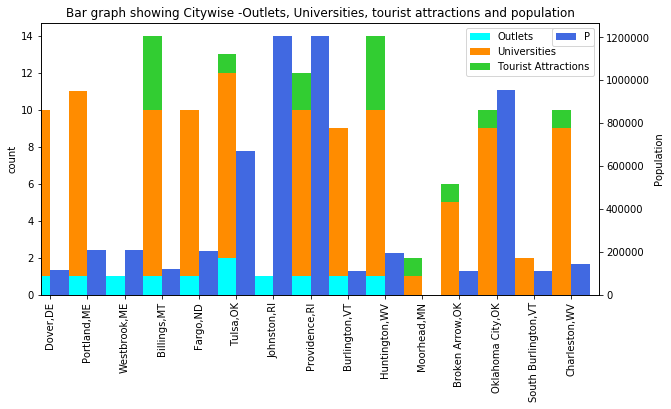

In [1022]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5
x= np.arange(len(merge_3['location.city']))
p1 =bar1.plot(kind='bar', color='cyan', ax=ax1, width=width, position=1)
p2 =bar2.plot(kind='bar', color='darkorange', ax=ax1,bottom=bar1,width=width, position=1)
p3 =bar3.plot(kind='bar', color='limegreen', ax=ax1,bottom=bar1+bar2,width=width, position=1)
p4 =merge_3['population'].plot(kind='bar', color='royalblue', ax=ax2, width=width, position=0)

ax1.set_ylabel('count')
ax2.set_ylabel('Population')

x_label = (merge_3['location.city']+','+merge_3['location.state'])
ax1.set_xticks(x)
ax1.set_xticklabels(x_label,rotation=90)
ax1.legend(('Outlets','Universities','Tourist Attractions'))
ax2.legend('Population')
ax1.set_title('Bar graph showing Citywise -Outlets, Universities, tourist attractions and population')
plt.show()

### Data Modelling


In [ ]:
#Data Cleaning

In [1023]:

print ("Shape of dataset : ", merge_3.shape)

Shape of dataset :  (15, 6)


In [1025]:
#Feature selection
merge_3.columns
#merge_3[['location.state', 'location.city', 'No_of_Outlets','No_of_Universities', 'No_of_attractions', 'population']] = merge_3[['location.state', 'location.city', 'No_of_Outlets',
  #     'No_of_Universities', 'No_of_attractions', 'population']].apply(pd.to_numeric,errors='coerce') 

print ("Shape of dataset after cleaning : ", merge_3.size)
print(merge_3)

Shape of dataset after cleaning :  90
   location.state     location.city  No_of_Outlets  No_of_Universities  \
0              DE             Dover            1.0                 9.0   
1              ME          Portland            1.0                10.0   
2              ME         Westbrook            1.0                 0.0   
3              MT          Billings            1.0                 9.0   
4              ND             Fargo            1.0                 9.0   
5              OK             Tulsa            2.0                10.0   
6              RI          Johnston            1.0                 0.0   
7              RI        Providence            1.0                 9.0   
8              VT        Burlington            1.0                 8.0   
9              WV        Huntington            1.0                 9.0   
10             MN          Moorhead            0.0                 1.0   
11             OK      Broken Arrow            0.0                 5.0   


In [1028]:
featureset = merge_3[[ 'No_of_Outlets','No_of_Universities', 'No_of_attractions','population']]

In [929]:
#Normalization

In [1030]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.5       , 0.9       , 0.        , 0.09559753],
       [0.5       , 1.        , 0.        , 0.17074078],
       [0.5       , 0.        , 0.        , 0.17074078],
       [0.5       , 0.9       , 1.        , 0.10011254],
       [0.5       , 0.9       , 0.        , 0.1697438 ]])

In [1128]:
#Clustering using Scikit Learn


In [1129]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.125086   0.9031315  1.00001019 0.07414627 0.73168119
  1.27590902 1.03341367 0.10017175 1.00213028 0.98063188 0.68741118
  0.8932335  0.86025251 0.55948158]
 [0.125086   0.         1.         1.0074663  0.10000497 0.67946081
  1.29910386 0.97348387 0.21578247 1.00503569 1.0731507  0.75435972
  0.84190894 0.94686962 0.57029842]
 [0.9031315  1.         0.         1.34721503 0.90000055 1.20899421
  0.82925922 1.32199503 0.80409084 1.34539836 0.59300288 0.75435972
  1.22833654 0.54457513 1.06077344]
 [1.00001019 1.0074663  1.34721503 0.         1.00242132 1.0154859
  1.61857883 1.02946463 1.00504115 0.06079268 1.20934797 0.98620853
  1.13648379 1.31913142 0.90157317]
 [0.07414627 0.10000497 0.90000055 1.00242132 0.         0.68734133
  1.22446942 0.96918799 0.12806851 1.00003906 0.99061242 0.69202464
  0.8366905  0.86394534 0.56137056]
 [0.73168119 0.67946081 1.20899421 1.0154859  0.68734133 0.
  1.22832507 0.72026556 0.75551443 0.98962677 1.45609303 1.21172684
  1.03216972 

In [ ]:
# I have  used the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. 
#The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

In [1051]:
!pip install sklearn

  Stored in directory: C:\Users\rmarathe\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [1054]:
import sklearn.cluster

In [1093]:
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 1, 0, 0, 4, 3, 2, 0, 0, 1, 0, 2, 1, 0], dtype=int64)

In [1095]:
merge_3['cluster_'] = agglom.labels_
merge_3

,location.state,location.city,No_of_Outlets,No_of_Universities,No_of_attractions,population,cluster_
0,DE,Dover,1.0,9.0,0.0,115352.0,0
1,ME,Portland,1.0,10.0,0.0,206023.0,0
2,ME,Westbrook,1.0,0.0,0.0,206023.0,1
3,MT,Billings,1.0,9.0,4.0,120800.0,0
4,ND,Fargo,1.0,9.0,0.0,204820.0,0
5,OK,Tulsa,2.0,10.0,1.0,672054.0,4
6,RI,Johnston,1.0,0.0,0.0,1206642.0,3
7,RI,Providence,1.0,9.0,2.0,1206642.0,2
8,VT,Burlington,1.0,8.0,0.0,108277.0,0
9,WV,Huntington,1.0,9.0,4.0,194155.0,0


In [1124]:
#Distribution of each cluster using scatter plot

In [1103]:
merge_3.groupby(['cluster_'])['cluster_'].count()

cluster_
0    8
1    3
2    2
3    1
4    1
Name: cluster_, dtype: int64

In [1142]:
#characteristics of each cluster

In [1133]:
agg_outlet = merge_3.groupby(['cluster_'])['No_of_Outlets','No_of_Universities','No_of_attractions','population'].mean()
agg_outlet

,No_of_Outlets,No_of_Universities,No_of_attractions,population
cluster_,,,,
0,0.750000,8.5,1.250000,1.500735e+05
1,0.333333,1.0,0.333333,1.047667e+05
2,0.500000,9.0,1.500000,1.081320e+06
3,1.000000,0.0,0.000000,1.206642e+06
4,2.000000,10.0,1.000000,6.720540e+05
